# Working With Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
import matplotlib as mpl
mpl.rc('font', family='Arial')
mpl.style.use('clean') # this loads my personal plotting settings
# https://raw.githubusercontent.com/iamlemec/dotfiles/master/python/clean.mplstyle
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Pandas!

## DataFrame

In [4]:
s = pd.Series(np.random.rand(10), index=np.arange(10, 20))
s

10    0.010136
11    0.435551
12    0.669649
13    0.636113
14    0.538867
15    0.454864
16    0.773729
17    0.041200
18    0.602475
19    0.388918
dtype: float64

In [5]:
print(s.index)
print(s.values)

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')
[0.0101362  0.43555142 0.66964858 0.63611318 0.53886684 0.45486372
 0.77372917 0.04120049 0.60247484 0.38891788]


In [6]:
s.describe()

count    10.000000
mean      0.455150
std       0.254542
min       0.010136
25%       0.400576
50%       0.496865
75%       0.627704
max       0.773729
dtype: float64

In [7]:
df = pd.DataFrame({'ser1': s, 'ser2': np.random.randn(10)})
df.head()

,ser1,ser2
10,0.010136,-1.602765
11,0.435551,-0.088201
12,0.669649,0.226451
13,0.636113,2.675177
14,0.538867,-0.288310


In [8]:
df.describe()

,ser1,ser2
count,10.000000,10.000000
mean,0.455150,-0.266624
std,0.254542,1.277634
min,0.010136,-1.795708
25%,0.400576,-1.136357
50%,0.496865,-0.188256
75%,0.627704,0.168206
max,0.773729,2.675177


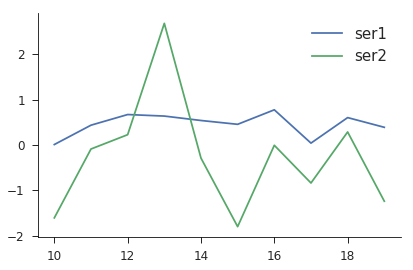

In [9]:
df.plot();

In [10]:
df['ser1']

10    0.010136
11    0.435551
12    0.669649
13    0.636113
14    0.538867
15    0.454864
16    0.773729
17    0.041200
18    0.602475
19    0.388918
Name: ser1, dtype: float64

In [11]:
df['ser1'] > 0.5

10    False
11    False
12     True
13     True
14     True
15    False
16     True
17    False
18     True
19    False
Name: ser1, dtype: bool

In [12]:
df1 = df[df['ser1']>0.5]
df1

,ser1,ser2
12,0.669649,0.226451
13,0.636113,2.675177
14,0.538867,-0.288310
16,0.773729,-0.006532
18,0.602475,0.286207


In [13]:
df.query('ser1 > 0.5')

,ser1,ser2
12,0.669649,0.226451
13,0.636113,2.675177
14,0.538867,-0.288310
16,0.773729,-0.006532
18,0.602475,0.286207


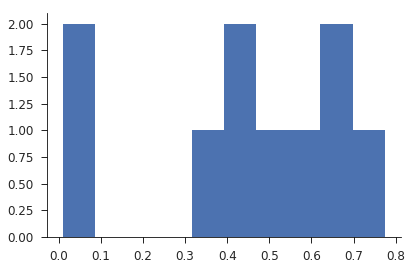

In [14]:
df['ser1'].hist(grid=False);

## Grouping Data

In [16]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block]+np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [17]:
df.head(10)

,block,value
0,2,1.390465
1,3,0.546267
2,1,0.279584
3,1,0.239002
4,2,0.631636
5,0,-0.075283
6,2,1.053114
7,0,-0.107730
8,3,0.183809
9,3,0.417762


In [18]:
df.groupby('block').size()

block
0    27
1    26
2    24
3    23
dtype: int64

In [19]:
df.groupby('block')['value'].mean()

block
0    0.118752
1    0.219888
2    0.338065
3    0.381055
Name: value, dtype: float64

In [20]:
df.groupby('block')['value'].std()

block
0    0.204609
1    0.113031
2    0.410726
3    0.205994
Name: value, dtype: float64

In [21]:
df.groupby('block')['value'].apply(lambda x: np.mean(np.abs(x-np.mean(x))))

block
0    0.164335
1    0.094458
2    0.308214
3    0.162592
Name: value, dtype: float64

In [22]:
grp = df.groupby('block')['value']
pd.DataFrame({
    'mean': grp.mean(),
    'stdv': grp.std(),
    'absd': grp.apply(lambda x: np.mean(np.abs(x-np.mean(x))))
})

,mean,stdv,absd
block,,,
0,0.118752,0.204609,0.164335
1,0.219888,0.113031,0.094458
2,0.338065,0.410726,0.308214
3,0.381055,0.205994,0.162592


## Time Series

In [23]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [24]:
days = pd.date_range('2016-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [25]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(N))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')
df.head()

,price
date,
2016-01-01,0.006447
2016-01-02,0.004153
2016-01-03,0.003122
2016-01-04,0.007976
2016-01-05,0.013635


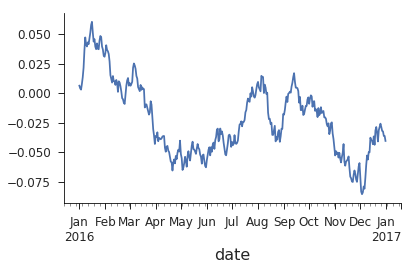

In [26]:
df['price'].plot();

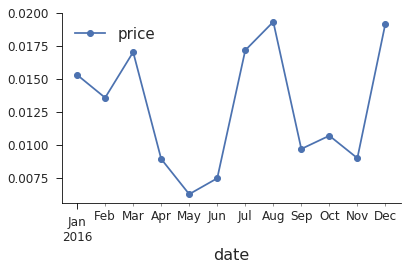

In [27]:
df.groupby(pd.TimeGrouper('MS')).std().plot(marker='o');

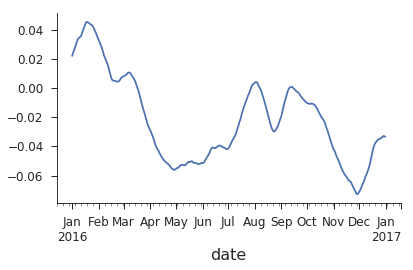

In [28]:
df.rolling(20, center=True, min_periods=5).mean().plot(legend=False);

## Transforming

In [29]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [30]:
days = pd.date_range('2006-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [31]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(len(days)))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')

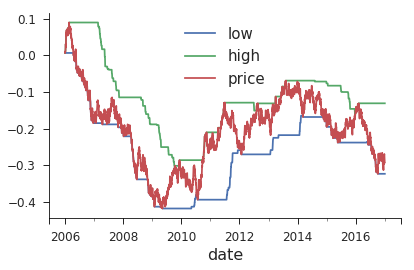

In [32]:
roll = df['price'].rolling(52*7, min_periods=1)
pd.DataFrame({
    'low' : roll.min(),
    'high': roll.max(),
    'price': df['price']
}).plot();

## Plotting

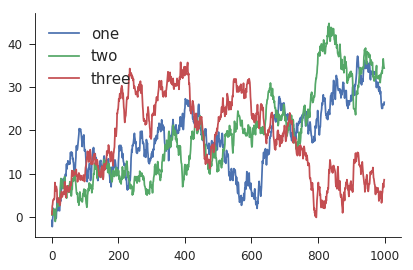

In [33]:
# good way to arrange plots
pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
}).plot();

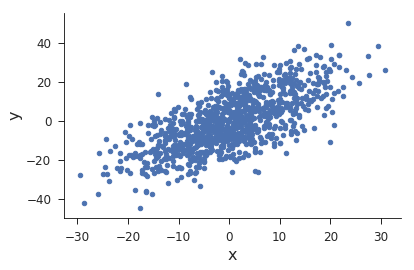

In [34]:
x = 10*np.random.randn(1000)
y = x + 10*np.random.randn(1000)
df = pd.DataFrame({
    'x': x,
    'y': y
})
df.plot.scatter(x='x', y='y');

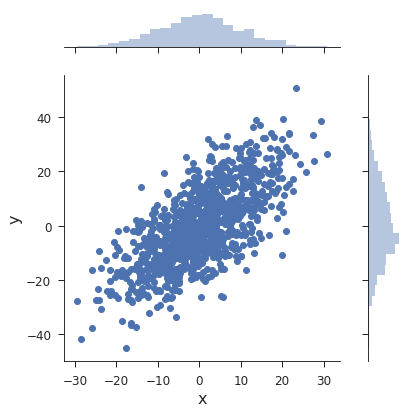

In [35]:
sns.jointplot('x', 'y', data=df);

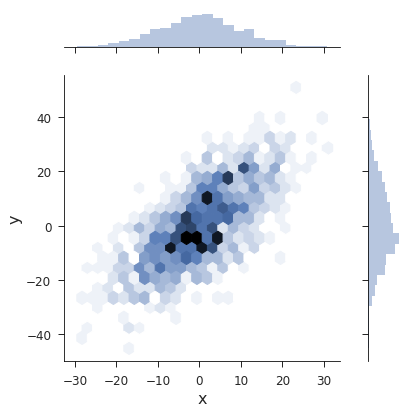

In [36]:
# kind in ['scatter', 'reg', 'resid', 'kde', 'hex']
sns.jointplot('x', 'y', kind='hex', data=df);

## Indexing

In [275]:
df = pd.DataFrame({
    'a': np.arange(10),
    'b': np.random.rand(10)
}, index=np.arange(10, 20))
df

,a,b
10,0,0.488563
11,1,0.871672
12,2,0.608276
13,3,0.450260
14,4,0.243059
15,5,0.417754
16,6,0.922033
17,7,0.723503
18,8,0.101899
19,9,0.857485


In [276]:
# slicing on index
df.loc[14]

a    4.000000
b    0.243059
Name: 14, dtype: float64

In [277]:
# slicing on location
df.iloc[4]

a    4.000000
b    0.243059
Name: 14, dtype: float64

In [278]:
# slicing on column
df['a']

10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
19    9
Name: a, dtype: int64

In [279]:
# selecting
df[df['a']>5]

,a,b
16,6,0.922033
17,7,0.723503
18,8,0.101899
19,9,0.857485


In [280]:
# advanced selecting
df[(df['a']>3)&(df['a']<8)]

,a,b
14,4,0.243059
15,5,0.417754
16,6,0.922033
17,7,0.723503


In [281]:
# selection mechanism
df['a'] > 3

10    False
11    False
12    False
13    False
14     True
15     True
16     True
17     True
18     True
19     True
Name: a, dtype: bool

In [282]:
# querying
df.query('a > 3 and a < 8')

,a,b
14,4,0.243059
15,5,0.417754
16,6,0.922033
17,7,0.723503


## Joining

In [5]:
mapp = pd.Series({x: 2*x for x in range(10)}, name='twox')
mapp

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
Name: twox, dtype: int64

In [6]:
init = pd.DataFrame({
    'ser': np.random.randint(10, size=100),
    'val': np.random.rand(100)
})
init.head()

,ser,val
0,2,0.621572
1,2,0.213838
2,9,0.773477
3,8,0.976865
4,7,0.108932


In [7]:
final = init.join(mapp, on='ser')
final.head()

,ser,val,twox
0,2,0.621572,4
1,2,0.213838,4
2,9,0.773477,18
3,8,0.976865,16
4,7,0.108932,14


In [8]:
final['check'] = final['twox'] == 2*final['ser']
final.head()

,ser,val,twox,check
0,2,0.621572,4,True
1,2,0.213838,4,True
2,9,0.773477,18,True
3,8,0.976865,16,True
4,7,0.108932,14,True


In [9]:
print(final['check'].all())

True


### Stack and unstack (and some pivot)

In [11]:
a = [0, 1, 2]
b = [1, 2, 3]
list(zip(a, b))

[(0, 1), (1, 2), (2, 3)]

In [20]:
# this constructs a family structure table
M, N = 5, 12
from itertools import cycle
cmap = list(zip(cycle(range(M)), range(100, 100+N), np.random.rand(N)))
pmap = pd.DataFrame(cmap, columns=['pid', 'cid', 'income'])
pmap = pmap.sort_values('pid').reset_index(drop=True)
pmap

,pid,cid,income
0,0,100,0.399383
1,0,105,0.226980
2,0,110,0.405280
3,1,101,0.807070
4,1,106,0.434924
5,1,111,0.839942
6,2,102,0.301537
7,2,107,0.783998
8,3,103,0.489635
9,3,108,0.120868


In [21]:
# tabulate the order of each child
pmap['order'] = pmap.groupby('pid').cumcount().apply(lambda x: f'child{x}')
ptab = pmap.set_index(['pid', 'order'])
ptab

cid    income
pid order                
0   child0  100  0.399383
    child1  105  0.226980
    child2  110  0.405280
1   child0  101  0.807070
    child1  106  0.434924
    child2  111  0.839942
2   child0  102  0.301537
    child1  107  0.783998
3   child0  103  0.489635
    child1  108  0.120868
4   child0  104  0.809601
    child1  109  0.848681

In [27]:
fam = ptab.unstack(level=1)
fam

cid                  income                    
order child0 child1 child2    child0    child1    child2
pid                                                     
0      100.0  105.0  110.0  0.399383  0.226980  0.405280
1      101.0  106.0  111.0  0.807070  0.434924  0.839942
2      102.0  107.0    NaN  0.301537  0.783998       NaN
3      103.0  108.0    NaN  0.489635  0.120868       NaN
4      104.0  109.0    NaN  0.809601  0.848681       NaN

In [19]:
# the reverse operation gives us (almost) what we started with
fam.stack(level='order')

cid    income
pid order                  
0   child0  100.0  0.380862
    child1  105.0  0.751449
    child2  110.0  0.564537
1   child0  101.0  0.619776
    child1  106.0  0.481614
    child2  111.0  0.367543
2   child0  102.0  0.454683
    child1  107.0  0.647542
3   child0  103.0  0.691210
    child1  108.0  0.307746
4   child0  104.0  0.195707
    child1  109.0  0.398245

In [28]:
# we can do this pivot too
ptab.reset_index().pivot('pid', 'order', ['cid', 'income'])

cid                  income                    
order child0 child1 child2    child0    child1    child2
pid                                                     
0      100.0  105.0  110.0  0.399383  0.226980  0.405280
1      101.0  106.0  111.0  0.807070  0.434924  0.839942
2      102.0  107.0    NaN  0.301537  0.783998       NaN
3      103.0  108.0    NaN  0.489635  0.120868       NaN
4      104.0  109.0    NaN  0.809601  0.848681       NaN

## Networks

In [322]:
import networkx as nx

In [323]:
df = pd.DataFrame({
    'src': np.random.randint(10, size=20),
    'dst': np.random.randint(10, size=20),
    'wgt': np.random.exponential(size=20)
})
df = df.drop_duplicates(subset=['src', 'dst'])
df = df.query('src != dst')
df.head()

,src,dst,wgt
0,2,1,0.814146
1,9,2,0.285914
3,4,6,0.678754
4,2,7,0.130463
5,2,5,0.319321


In [324]:
G = nx.Graph()
G.add_nodes_from(np.arange(10))
G.add_weighted_edges_from([(x['src'], x['dst'], x['wgt']) for i, x in df.iterrows()])
# G.add_weighted_edges_from(df[['src', 'dst', 'wgt']].values) # equivalent
G

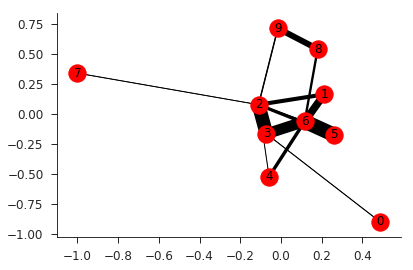

In [325]:
edgewidth = [5*d['weight'] for (u,v,d) in G.edges(data=True)]
pos = nx.spring_layout(G, iterations=50)
nx.draw_networkx(G, pos);
nx.draw_networkx_edges(G, pos, width=edgewidth);

In [326]:
nx.centrality.eigenvector.eigenvector_centrality(G, weight='weight')

{0: 0.014984664628016488,
 1: 0.25187011722483515,
 2: 0.41342404251907744,
 3: 0.4957342799865927,
 4: 0.08565301767573853,
 5: 0.40394644405039504,
 6: 0.5856505923266612,
 7: 0.011080427040346091,
 8: 0.06634358195553779,
 9: 0.04055806292115489}

## Input/Output

In [327]:
df = pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
})
df.to_csv('test.csv', index=False)

In [328]:
!head test.csv

one,two,three
-0.1285709281358981,0.3176125551074668,-0.2585060471555192
-1.7741568477290834,0.16659566855322125,0.22210933024400203
-3.810213559329566,-0.09773890588254999,0.3422721531311517
-4.37376793620038,-1.6163588553623158,1.5383410177927561
-4.451852742619451,-3.099750903224469,1.080724177796487
-5.090891069970774,-3.2930124774664193,-0.51083324112867
-4.795508132265199,-4.104892316330931,0.12842439609901457
-4.280690500376044,-4.490414359516868,0.8423501732116149
-3.974617847405019,-3.8938394114836363,1.8988281489591108


In [329]:
df = pd.read_csv('test.csv')
df.head()

,one,two,three
0,-0.128571,0.317613,-0.258506
1,-1.774157,0.166596,0.222109
2,-3.810214,-0.097739,0.342272
3,-4.373768,-1.616359,1.538341
4,-4.451853,-3.099751,1.080724


Can also use the many `pd.DataFrame.to_*` and `pd.read_*` function where `*` is one of:
- csv
- excel
- json
- html
- latex
- stata
- sql

## External Data

In [330]:
import pandas_datareader as pdr

In [331]:
emp = pdr.fred.FredReader(['UNRATE', 'LNS12300060'], start='1948-01-01').read()
emp = emp.rename(columns={'UNRATE': 'unemp', 'LNS12300060': 'empop'}).rename_axis('date')
emp.head()

,unemp,empop
date,,
1948-01-01,3.4,62.6
1948-02-01,3.8,62.7
1948-03-01,4.0,62.6
1948-04-01,3.9,62.9
1948-05-01,3.5,62.5


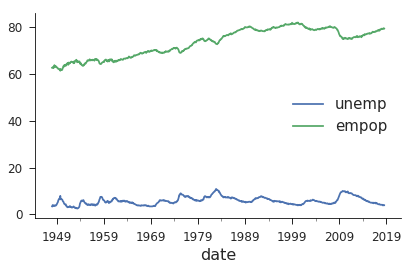

In [333]:
emp.plot();

In [64]:
# detrender
def detrend(s):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    ret = smf.ols(f'{name} ~ 1 + year', data=df).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

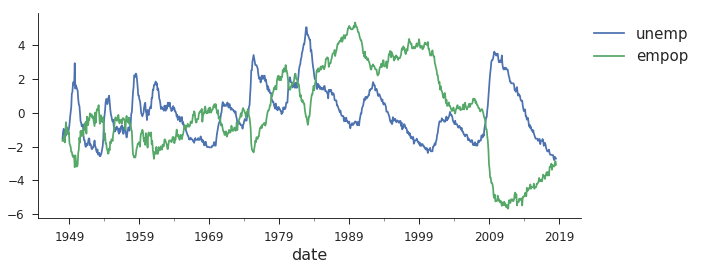

In [269]:
emp.apply(detrend).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [65]:
# detrend poly!
def detrendn(s, deg=1):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    df['zyear'] = df['year'] - df['year'].min()
    reg = []
    for n in range(deg+1):
        ds = f'year{n}'
        df[ds] = df['zyear']**n
        reg.append(ds)
    reg = f'{name} ~ ' + ' + '.join(reg)
    ret = smf.ols(reg, data=df).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

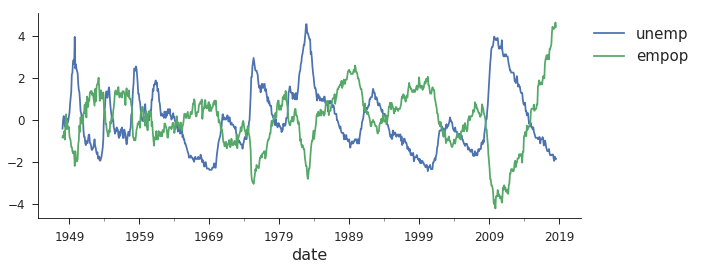

In [270]:
emp.apply(lambda s: detrendn(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [68]:
# let's not reinvent the wheel
def detrendn1(s, deg=1):
    year = s.index.year
    zyear = year - year.min()
    coef = np.polyfit(zyear, s, deg)
    vals = np.polyval(coef, zyear)
    pred = pd.Series(vals, index=s.index, name=s.name)
    return s - pred

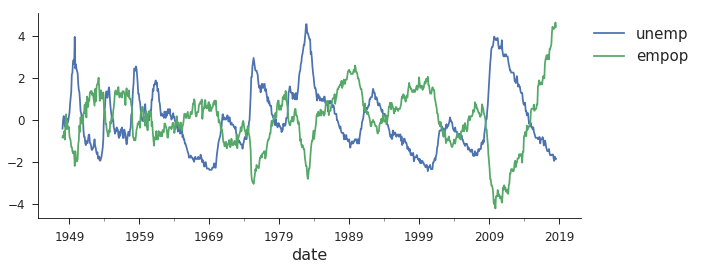

In [271]:
emp.apply(lambda s: detrendn1(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

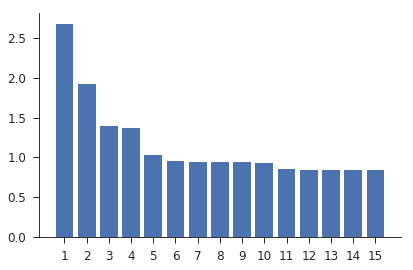

In [70]:
dvec = np.arange(1, 15+1)
plt.bar(dvec, [np.std(detrendn1(emp['empop'], deg=d)) for d in dvec]);
plt.xticks(dvec);

# Regressions

In [335]:
import statsmodels.formula.api as smf

## Basic

In [334]:
N = 100
x = np.random.randn(N)
y = 3*np.random.randn(N)
z = 1 + 2*x + 3*y + 4*x*y + np.random.randn(N)
df = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z
})

In [336]:
ret = smf.ols('z ~ 1 + x + y', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     30.38
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           5.71e-11
Time:                        11:29:44   Log-Likelihood:                -370.58
No. Observations:                 100   AIC:                             747.2
Df Residuals:                      97   BIC:                             755.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2666      1.007      0.265      0.792      -1.733       2.266
x              0.0526      1.160      0.045      0.964      -2.249       2.354
y              2.7259      0.350      7.778      0.000       2.030       3.421
==============================================================================
Omnibus:                       67.658   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.405
Skew:                          -1.962   Prob(JB):                    1.03e-128
Kurtosis:                      14.227   Cond. No.                         3.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [339]:
ret.params

Intercept    0.266600
x            0.052608
y            2.725896
dtype: float64

In [342]:
ret = smf.ols('z ~ 1 + x*y', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     5427.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          5.74e-107
Time:                        11:32:52   Log-Likelihood:                -137.93
No. Observations:                 100   AIC:                             283.9
Df Residuals:                      96   BIC:                             294.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0532      0.099     10.621      0.000       0.856       1.250
x              1.9658      0.115     17.031      0.000       1.737       2.195
y              2.9763      0.034     86.307      0.000       2.908       3.045
x:y            4.0321      0.040     99.874      0.000       3.952       4.112
==============================================================================
Omnibus:                        3.976   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.488
Skew:                           0.309   Prob(JB):                        0.175
Kurtosis:                       3.674   Cond. No.                         3.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

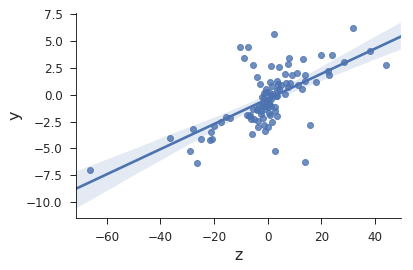

In [75]:
sns.regplot('z', 'y', data=df);

## Categorical

In [343]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block] + np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [346]:
ret = smf.ols('value ~ 0 + C(block)', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     5.218
Date:                Wed, 26 Sep 2018   Prob (F-statistic):            0.00222
Time:                        11:35:34   Log-Likelihood:                -25.131
No. Observations:                 100   AIC:                             58.26
Df Residuals:                      96   BIC:                             68.68
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C(block)[0]     0.0620      0.062      0.996      0.322      -0.062       0.186
C(block)[1]     0.1982      0.073      2.721      0.008       0.054       0.343
C(block)[2]     0.1810      0.058      3.122      0.002       0.066       0.296
C(block)[3]     0.4081      0.064      6.427      0.000       0.282       0.534
==============================================================================
Omnibus:                       11.487   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               27.499
Skew:                          -0.263   Prob(JB):                     1.07e-06
Kurtosis:                       5.514   Cond. No.                         1.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [347]:
ret.params - cmean

C(block)[0]   -0.037959
C(block)[1]   -0.001813
C(block)[2]   -0.119017
C(block)[3]    0.008109
dtype: float64

In [349]:
stderr_reg = np.sqrt(ret.cov_params().values.diagonal())
stderr_rob = np.sqrt(ret.cov_HC0.diagonal())

## Bootstrapping

In [350]:
from sklearn.utils import resample

In [351]:
def gen_block_data(N, cmean, cvars):
    cmean = np.array(cmean)
    cvars = np.array(cvars)
    block = np.random.randint(len(cmean), size=N)
    value = cmean[block] + np.random.randn(N)*cvars[block]
    return pd.DataFrame({
        'block': block,
        'value': value
    })

In [352]:
N = 100
K = 1000
cmean = [0.1, 0.2, 0.3, 0.4]
cvars = [0.2, 0.1, 0.5, 0.2]
mygen = lambda: gen_block_data(N, cmean, cvars)
myeqn = 'value ~ 0 + C(block)'
data0 = mygen()
mysamp = lambda: resample(data0)

In [355]:
res = pd.DataFrame({i: smf.ols(myeqn, data=mygen()).fit().params for i in range(K)}).T
res.columns = ['b0', 'b1', 'b2', 'b3']
stderr_bsp0 = res.std().values

In [353]:
res = pd.DataFrame({i: smf.ols(myeqn, data=mysamp()).fit().params for i in range(K)}).T
res.columns = ['b0', 'b1', 'b2', 'b3']
stderr_bsp = res.std().values

In [356]:
pd.DataFrame({
    'stderr_reg': stderr_reg,
    'stderr_rob': stderr_rob,
    'stderr_bsp0': stderr_bsp0,
    'stderr_bsp': stderr_bsp
}).T

,0,1,2,3
stderr_reg,0.062271,0.072844,0.057971,0.063504
stderr_rob,0.042682,0.018810,0.089238,0.042940
stderr_bsp0,0.040457,0.019721,0.102378,0.041105
stderr_bsp,0.034028,0.023954,0.091076,0.040653


In [86]:
(2*(1/(stderr_bsp0/cvars)))**2/N

array([0.99007563, 0.9698687 , 0.91714689, 0.96716595])

## MAPS

In [4]:
import geopandas as gpd
from ipywidgets import interact, IntSlider

In [6]:
pref_hist = gpd.read_file('/media/Solid/data/china_firms_plus/prefect/polys/v6_time_pref_pgn_utf_wgs84.shp')
pref_hist = pref_hist.rename(columns={
    'NAME_CH': 'name_zh',
    'NAME_PY': 'name_en',
    'BEG_YR': 'beg_yr',
    'END_YR': 'end_yr'
})[['name_zh', 'name_en', 'beg_yr', 'end_yr', 'geometry']]
print(len(pref_hist))
pref_hist.head()

3830


,name_zh,name_en,beg_yr,end_yr,geometry
0,辽州,Liao Zhou,1151,1217,"POLYGON ((113.5494117121449 36.75454348982893,..."
1,沁州,Qin Zhou,1129,1217,(POLYGON ((112.0031955306821 36.84233514703692...
2,霍州,Huo Zhou,1772,1911,"(POLYGON ((111.859101043598 36.44625789061279,..."
3,南泽州,Nanzhe Zhou,1128,1150,"POLYGON ((113.2364541423517 35.44530150464939,..."
4,泽州,Zezhou Fu,1151,1217,"POLYGON ((113.2364541423517 35.44530150464939,..."


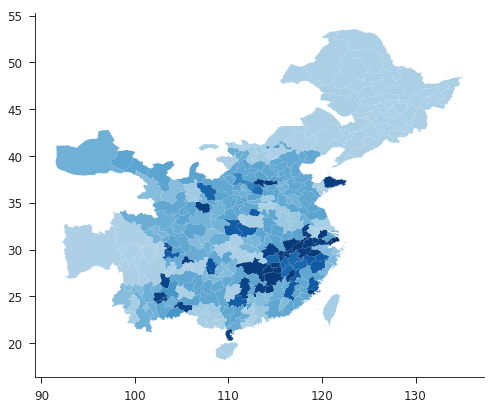

In [6]:
pref_hist.query('end_yr == 1911').plot(column='beg_yr', cmap='Blues_r', vmax=2200, figsize=(7, 7));

In [7]:
def plot_year(yr):
    df = pref_hist.query(f'beg_yr <= {yr} and end_yr >= {yr}')
    df['age'] = yr - df['beg_yr']
    yrmax = df['age'].max()
    fig, ax = plt.subplots(figsize=(7, 7))
    df.plot(column='age', cmap='Blues', ax=ax, vmin=-100, vmax=600);
    ax.set_xlim(85, 135)
    ax.set_ylim(15, 50)
    ax.set_aspect('equal')
interact(plot_year, yr=IntSlider(min=-224, max=1911, value=1900));

interactive(children=(IntSlider(value=1900, description='yr', max=1911, min=-224), Output()), _dom_classes=('w…

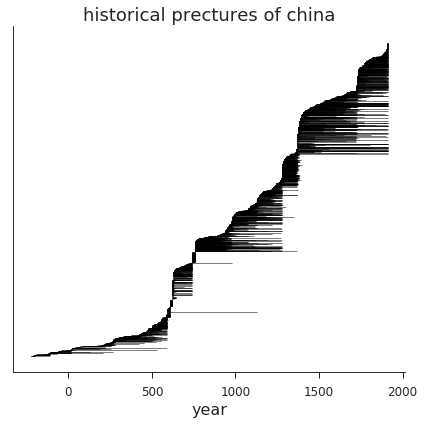

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
pref_range = pref_hist.sort_values('beg_yr')[['beg_yr', 'end_yr']].set_index(np.arange(len(pref_hist)))
for (i, (b, e)) in pref_range.iterrows():
    ax.hlines(i, b, e, linewidth=0.5)
ax.yaxis.set_visible(False);
ax.set_xlabel('year');
ax.set_title('historical prectures of china');

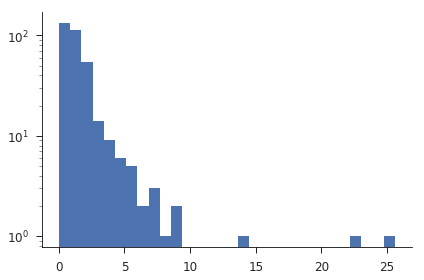

In [9]:
pref_hist.query('end_yr == 1911').area.hist(log=True, bins=30, grid=False);

### Advanced

In [9]:
year = 1776
pref_old = pref_hist.query(f'beg_yr <= {year} and end_yr >= {year}')
pref_old = pref_old[pref_old.is_valid]
pref_old.head()

,name_zh,name_en,beg_yr,end_yr,geometry
2,霍州,Huo Zhou,1772,1911,"(POLYGON ((111.859101043598 36.44625789061279,..."
184,郧阳府,Yunyang Fu,1476,1911,"POLYGON ((110.9188105395923 31.66655190992471,..."
185,襄阳府,Xiangyang Fu,1476,1911,"POLYGON ((112.6511344115614 31.66700855914823,..."
186,德安府,De'an Fu,1729,1911,"POLYGON ((113.9180143673158 31.39151155379741,..."
187,汉阳府,Hanyang Fu,1763,1911,"POLYGON ((114.3508516422754 30.68762580236229,..."


In [10]:
pref_new = gpd.read_file('/media/Solid/data/china_firms_plus/prefect/modern/CHN_adm2.shp')
pref_new = pref_new.rename(columns={
    'NL_NAME_2': 'name_zh',
    'VARNAME_2': 'name_en',
})[['name_zh', 'name_en', 'geometry']]
pref_new.head()

,name_zh,name_en,geometry
0,安庆市,Ānqìng,"POLYGON ((117.1155700683596 31.16616439819359,..."
1,蚌埠市,Bèngbù,"POLYGON ((117.2620468139648 33.49958801269543,..."
2,亳州市,Bózhōu,"POLYGON ((115.739501953125 34.07428359985374, ..."
3,巢湖市,Cháohú,"POLYGON ((118.369781494141 31.9289722442627, 1..."
4,池州市,Chízhōu,"POLYGON ((117.9780044555667 30.82234191894554,..."


In [11]:
# choose a random modern prefecture
pref_samp = pref_new.query('name_zh == "成都市"')
name_zh, name_en = pref_samp.iloc[0][['name_zh', 'name_en']]
print(name_zh, name_en)

成都市 Chéngdū


In [15]:
# efficiently find the intersection with old provinces
xmin, ymin, xmax, ymax = pref_samp.iloc[[0]].total_bounds
old_subset = pref_old.cx[xmin:xmax, ymin:ymax]
print(len(old_subset))
inter = gpd.overlay(old_subset[['name_en', 'name_zh', 'geometry']], pref_samp, how='intersection')
print(inter[['name_en', 'name_zh']].drop_duplicates())

9
         name_en name_zh
0        Zi Zhou      资州
1       Mei Zhou      眉州
3     Qiong Zhou      邛州
4      Yazhou Fu     雅州府
13      Mao Zhou      茂州
14    Chengdu Lu     成都府
15  Tongchuan Fu     潼川府


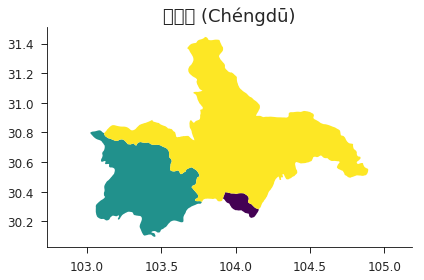

In [16]:
inter1 = inter[inter.area>0.001]
inter1['index'] = np.arange(len(inter1))
inter1.plot(column='index', cmap='viridis');
plt.title(f'{name_zh} ({name_en})');
plt.axis('equal');